# Speed Dating: Exploratory Data Analysis

## Imports

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import plotly.graph_objects as go

# show all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [350]:
# import data from S3 bucket
path = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv"
speed_dating_data = pd.read_csv(path, encoding="cp1252")
df = speed_dating_data.copy()

## Data Exploration

In [351]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [352]:
print("rows", df.shape[0], "\ncolumns", df.shape[1])

rows 8378 
columns 195


In [353]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [354]:
counter = {}

for type in df.dtypes:
    counter[type] = counter.get(type, 0) + 1

In [355]:
# show percentage of missing values for each variable
# sort 
missing_values_perc = (df.isna().sum()/len(df)*100).round(2).sort_values(ascending=True)
missing_values_perc

iid          0.00
dec_o        0.00
samerace     0.00
match        0.00
partner      0.00
order        0.00
position     0.00
dec          0.00
wave         0.00
condtn       0.00
idg          0.00
gender       0.00
round        0.00
id           0.01
pid          0.12
race         0.75
field        0.75
race_o       0.87
hiking       0.94
dining       0.94
exercise     0.94
goal         0.94
sports       0.94
go_out       0.94
museums      0.94
attr2_1      0.94
tvsports     0.94
art          0.94
tv           0.94
clubbing     0.94
reading      0.94
sinc2_1      0.94
theater      0.94
movies       0.94
concerts     0.94
music        0.94
shopping     0.94
yoga         0.94
attr1_1      0.94
sinc1_1      0.94
gaming       0.94
from         0.94
imprace      0.94
intel1_1     0.94
intel2_1     0.94
fun2_1       0.94
imprelig     0.94
field_cd     0.98
pf_o_att     1.06
pf_o_sin     1.06
pf_o_int     1.06
shar2_1      1.06
fun1_1       1.06
amb2_1       1.06
career       1.06
age       

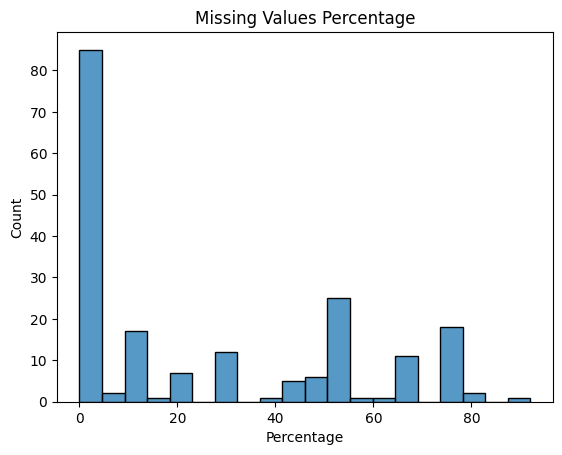

In [356]:
# make histogram to visualize missing values percentage
# 20 bins, each one representing 5%
sns.histplot(missing_values_perc, bins=20)
plt.title("Missing Values Percentage")
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.show()

- It seems like most of our variables have less than 5% missing values, but there are some in the 40-70% range that are necessary to look for. 
- The treatment will depend on the type, importance and percentage of missing values of each variable.

In [357]:
# variables with less than 33% missing values
missing_values_perc_33 = missing_values_perc[missing_values_perc < 33]
print("Count of variables:", len(missing_values_perc_33))

missing_values_33_perc_total = len(missing_values_perc_33)/df.shape[1]
print("Percentage of variables with less than 33% missing values:", round(missing_values_33_perc_total,4)*100, "%")

Count of variables: 124
Percentage of variables with less than 33% missing values: 63.59 %


- A first glance approach would be to use the variables with the least missing values, but it is not possible to do that before looking at the importance and relationship between the variables. 

## Exploratory Data Analysis

In [358]:
def value_counts(data, col):
    return round(data[col].value_counts(1)*100, 2)

In [359]:
df_num = df.select_dtypes(include="number")
df_num.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5

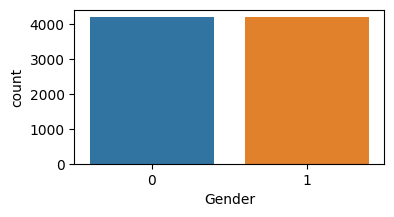

In [360]:
plt.figure(figsize=(4,2))
sns.countplot(x = df["gender"])
plt.xlabel("Gender")
plt.show()

In [361]:
# percentage of first dates that were a match
value_counts(df, "match")

match
0    83.53
1    16.47
Name: proportion, dtype: float64

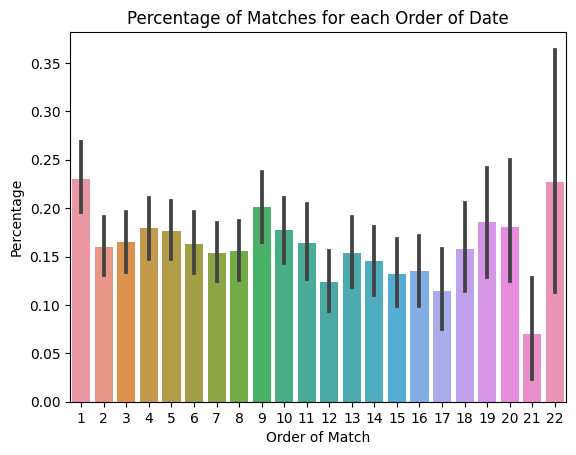

In [362]:
# percentage of matches for each order of date
# does order have any influence on matches?
sns.barplot(data=df, x="order", y="match")
plt.title("Percentage of Matches for each Order of Date")
plt.ylabel("Percentage")
plt.xlabel("Order of Match")
plt.show()

In [363]:
# masked df with only order and match columns
df_order_match = df[["order", "match"]]
df_order_match.head(10)

,order,match
0,4,0
1,3,0
2,10,1
3,5,1
4,7,1
5,6,0
6,1,0
7,2,0
8,8,1
9,9,0


In [364]:
# percentage of matches by order of date
matches_by_order = round(pd.Series(df_order_match[df_order_match["match"]==1].value_counts() / df["order"].value_counts() * 100).sort_values(ascending=False),2)
matches_by_order

order  match
1      1        23.05
22     1        22.73
9      1        20.12
19     1        18.54
20     1        18.06
4      1        17.97
10     1        17.72
5      1        17.60
3      1        16.52
11     1        16.40
6      1        16.27
2      1        15.97
18     1        15.81
8      1        15.55
7      1        15.37
13     1        15.32
14     1        14.52
16     1        13.49
15     1        13.17
12     1        12.37
17     1        11.46
21     1         6.98
Name: count, dtype: float64

In [365]:
# masked dataframe containing data from matches (1) and no matches (0)
match = df[df["match"]==1]
no_match = df[df["match"]==0]


In [366]:
# relationship between same race and match
value_counts(match, "samerace")

samerace
0    58.99
1    41.01
Name: proportion, dtype: float64

In [367]:
value_counts(no_match, "samerace")

samerace
0    60.7
1    39.3
Name: proportion, dtype: float64

In [368]:
print("Average age of all participants", round(df["age_o"].mean(),2))

female = df[df["gender"]==0]
male = df[df["gender"]==1]

print("Average age of female participants:", round(female["age_o"].mean(),2))
print("Average age of male participants:", round(male["age_o"].mean(),2))

Average age of all participants 26.36
Average age of female participants: 26.62
Average age of male participants: 26.11


In [369]:
match["age"].mean()

26.077092511013216

In [370]:
no_match["age"].mean()

26.414390983961855

In [371]:
match["int_corr"].mean()

0.21731851851851852

In [372]:
no_match["int_corr"].mean()

0.19182241630276564

In [373]:
value_counts(df, "goal")

goal
1.0    41.28
2.0    36.29
3.0     7.60
5.0     6.15
6.0     5.05
4.0     3.63
Name: proportion, dtype: float64

In [374]:
value_counts(match, "goal")

goal
1.0    42.71
2.0    35.46
3.0     7.33
5.0     6.23
6.0     4.54
4.0     3.74
Name: proportion, dtype: float64

In [375]:
value_counts(no_match, "goal")

goal
1.0    41.00
2.0    36.46
3.0     7.66
5.0     6.13
6.0     5.15
4.0     3.61
Name: proportion, dtype: float64

In [376]:
value_counts(match, "date")

date
4.0    26.76
6.0    21.77
5.0    17.38
7.0    15.54
3.0    11.66
2.0     4.77
1.0     2.13
Name: proportion, dtype: float64

In [377]:
value_counts(no_match, "date")

date
6.0    25.98
4.0    24.22
5.0    18.66
7.0    17.67
3.0     9.02
2.0     3.51
1.0     0.94
Name: proportion, dtype: float64

In [378]:
value_counts(df, "career_c")

career_c
2.0     28.16
7.0     26.33
6.0      8.79
1.0      8.19
9.0      6.64
4.0      5.11
10.0     4.60
3.0      3.17
5.0      2.84
11.0     2.67
13.0     0.98
15.0     0.93
16.0     0.53
8.0      0.47
12.0     0.34
14.0     0.12
17.0     0.12
Name: proportion, dtype: float64

In [379]:
match[["career_c"]].value_counts()

career_c
7.0         390
2.0         360
1.0         134
6.0         115
9.0          79
4.0          70
3.0          54
10.0         48
5.0          36
11.0         35
15.0         13
16.0          8
13.0          6
8.0           5
14.0          3
12.0          1
17.0          1
Name: count, dtype: int64

In [380]:
no_match[["career_c"]].value_counts()

career_c
2.0         1960
7.0         1780
6.0          609
1.0          541
9.0          468
4.0          351
10.0         331
3.0          207
5.0          198
11.0         185
13.0          75
15.0          64
16.0          36
8.0           34
12.0          27
17.0           9
14.0           7
Name: count, dtype: int64

In [381]:
# percentage of matches for each profession
numbers = np.arange(1,18)

for i in numbers:
    profession_match = round(df[df["career_c"]==i]["match"].value_counts(1)*100, 2)
    print(i, profession_match[1])
    

1 19.85
2 15.52
3 20.69
4 16.63
5 15.38
6 15.88
7 17.97
8 12.82
9 14.44
10 12.66
11 15.91
12 3.57
13 7.41
14 30.0
15 16.88
16 18.18
17 10.0


In [414]:
len_dict = {}
for i in numbers:
    length = len(df[df["career_c"]==i]["match"])
    len_dict[i] = length

length = pd.Series(len_dict)
length

1      675
2     2320
3      261
4      421
5      234
6      724
7     2170
8       39
9      547
10     379
11     220
12      28
13      81
14      10
15      77
16      44
17      10
dtype: int64

In [388]:
test_dict = {}
for i in numbers:
    value_counts = round(df[df["career_c"]==i]["match"].value_counts(1)*100, 2)
    test_dict[i] = value_counts[1]

print(test_dict)

{1: 19.85, 2: 15.52, 3: 20.69, 4: 16.63, 5: 15.38, 6: 15.88, 7: 17.97, 8: 12.82, 9: 14.44, 10: 12.66, 11: 15.91, 12: 3.57, 13: 7.41, 14: 30.0, 15: 16.88, 16: 18.18, 17: 10.0}


In [398]:
profession_match = pd.DataFrame.from_dict(test_dict, orient="index")
profession_match

,0
1,19.85
2,15.52
3,20.69
4,16.63
5,15.38
6,15.88
7,17.97
8,12.82
9,14.44
10,12.66


In [404]:
profession_match.rename(columns={0: "match_percentage"}, inplace=True)

In [417]:
profession_match["quantity"] = length
profession_match[profession_match["quantity"]>50].sort_values(by="match_percentage", ascending=False)

,match_percentage,quantity
3,20.69,261
1,19.85,675
7,17.97,2170
15,16.88,77
4,16.63,421
11,15.91,220
6,15.88,724
2,15.52,2320
5,15.38,234
9,14.44,547


In [423]:
test_dict = {}

for i in numbers:
    avg_age_profession = round(df[df["career_c"]==i]["age"].mean(), 2)
    test_dict[i] = avg_age_profession
print(test_dict)

{1: 24.4, 2: 26.81, 3: 24.38, 4: 26.65, 5: 24.75, 6: 26.65, 7: 27.33, 8: 27.23, 9: 26.37, 10: 24.78, 11: 24.51, 12: 24.5, 13: 24.99, 14: 21.0, 15: 28.58, 16: 25.5, 17: 25.0}


In [424]:
profession_match["age"] = test_dict
profession_match

,match_percentage,quantity,age
1,19.85,675,24.40
2,15.52,2320,26.81
3,20.69,261,24.38
4,16.63,421,26.65
5,15.38,234,24.75
6,15.88,724,26.65
7,17.97,2170,27.33
8,12.82,39,27.23
9,14.44,547,26.37
10,12.66,379,24.78


In [422]:
test_dict

{1: 24.4,
 2: 26.81,
 3: 24.38,
 4: 26.65,
 5: 24.75,
 6: 26.65,
 7: 27.33,
 8: 27.23,
 9: 26.37,
 10: 24.78,
 11: 24.51,
 12: 24.5,
 13: 24.99,
 14: 21.0,
 15: 28.58,
 16: 25.5,
 17: 25.0}

In [ ]:
df["exphappy"].mean()

5.534130723692159

In [ ]:
match["exphappy"].mean()

5.642961876832844

In [ ]:
no_match["exphappy"].mean()

5.51265731231014

In [ ]:
match["expnum"].mean()

7.015151515151516

In [ ]:
df["attr1_1"].mean(), df["sinc1_1"].mean(), df["intel1_1"].mean(), df["fun1_1"].mean(), df["amb1_1"].mean(), df["shar1_1"].mean()

(22.51463188335944,
 17.396388721532716,
 20.26561272442463,
 17.45704306912776,
 10.68253895397995,
 11.845110815066004)

In [ ]:
match["attr1_1"].mean(), match["sinc1_1"].mean(), match["intel1_1"].mean(), match["fun1_1"].mean(), match["amb1_1"].mean(), match["shar1_1"].mean()

(22.938739926739927,
 16.88302564102564,
 20.48096703296703,
 18.02837123991196,
 10.621154411764707,
 11.152882352941177)

In [ ]:
no_match["attr1_1"].mean(), no_match["sinc1_1"].mean(), no_match["intel1_1"].mean(), no_match["fun1_1"].mean(), no_match["amb1_1"].mean(), no_match["shar1_1"].mean()

(22.43114364003461,
 17.49744736083069,
 20.22321892125757,
 17.344608720762345,
 10.694604711663535,
 11.9816093953893)

In [ ]:
no_match["attr3_1"].mean(), no_match["sinc3_1"].mean(), no_match["intel3_1"].mean(), no_match["fun3_1"].mean(), no_match["amb3_1"].mean()

(7.062265241259752,
 8.296157180005778,
 8.401906963305404,
 7.669170759895984,
 7.570066454781855)

In [ ]:
match["attr3_1"].mean(), match["sinc3_1"].mean(), match["intel3_1"].mean(), match["fun3_1"].mean(), match["amb3_1"].mean()

(7.199851961509992,
 8.288675055514434,
 8.414507772020725,
 7.885270170244263,
 7.621021465581051)

In [ ]:
no_match["attr5_1"].mean(), no_match["sinc5_1"].mean(), no_match["intel5_1"].mean(), no_match["fun5_1"].mean(), no_match["amb5_1"].mean()

(6.94011108427916,
 7.922965467278435,
 8.28374788698382,
 7.402318280608549,
 7.6049263462931656)

In [ ]:
match["attr5_1"].mean(), match["sinc5_1"].mean(), match["intel5_1"].mean(), match["fun5_1"].mean(), match["amb5_1"].mean()

(6.951633986928105,
 7.950326797385621,
 8.287581699346406,
 7.555555555555555,
 7.686274509803922)

In [ ]:
df[["match", "met"]].value_counts()

match  met
0      0.0    3446
       2.0    2993
1      2.0     604
       0.0     601
0      1.0     211
1      1.0     140
0      7.0       2
       3.0       1
       5.0       1
       6.0       1
       8.0       1
1      5.0       1
       7.0       1
Name: count, dtype: int64

In [ ]:
value_counts(df, "length")

TypeError: 'Series' object is not callable

In [ ]:
value_counts(df, "numdat_2")

numdat_2
2.0    48.73
3.0    42.54
1.0     8.73
Name: proportion, dtype: float64

## Questions to be answered

### Helpers (Jedha)

#### 1. What are the least desirable attributes in a male partner? Does this differ for female partners?

#### 2. How important do people think attractiveness is in potential mate selection vs. its real impact?

#### 3. Are shared interests more important than a shared racial background?

#### 4. Can people accurately predict their own perceived value in the dating market?

#### 5. In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

### Additional Research

## Conclusions